# Exercise 6.1
### Introduction
$ 4V_1 -V_2-V_3 -V_4 = V_+$

$-V_1 +3V_2+0V_3 - V_4 = 0$

$ -V_1 + 0V_2 + 3V_3 - V_4 = V_+$

$-V_1 - V_2 - V_3 + 4V_4 = 0$

Solved in first block with his fancy thing
Solved in second block with linalg

In [55]:
from numpy import array,empty

A = array([[ 4, -1, -1, -1 ],
           [-1,  3,  0, -1 ],
           [-1,  0,  3, -1 ],
           [-1, -1, -1,  4 ]],float)
v = array([ 5, 0, 5, 0 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):
    #Partial Pivot
    for i in range(N-1,m,-1):
        if abs(A[i,m]) > abs(A[i-1,m]):
            #swap rows
            A[[i,i-1],:] = A[[i-1,i],:]
            v[[i,i-1]] = v[[i-1,i]]
    
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)

[3.         1.66666667 3.33333333 2.        ]


In [50]:
from numpy.linalg import solve
from numpy import array
A = array([[ 4, -1, -1, -1 ],
           [-1,  3,  0, -1 ],
           [-1,  0,  3, -1 ],
           [-1, -1, -1,  4 ]],float)
v = array([ 5, 0, 5, 0 ],float)
x = solve(A,v)
x

array([3.        , 1.66666667, 3.33333333, 2.        ])

### Conclusion
I forgot to swap the v rows too... But it works now.

# Exercise 6.2
### Introduction
Make partial pivoting happen

In [57]:
from numpy import array,empty

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    for i in range(N-1,m,-1):
        if abs(A[i,m]) > abs(A[i-1,m]):
            #swap rows
            A[[i,i-1],:] = A[[i-1,i],:]
            v[[i,i-1]] = v[[i-1,i]]
    
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Equation 6.1")
print(x)

from numpy import array,empty

A = array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    for i in range(N-1,m,-1):
        if abs(A[i,m]) > abs(A[i-1,m]):
            #swap rows
            A[[i,i-1],:] = A[[i-1,i],:]
            v[[i,i-1]] = v[[i-1,i]]
    
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Equation 6.17")
print(x)

Equation 6.1
[ 2. -1. -2.  1.]
Equation 6.17
[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


### Conclusion
It works! Thanks for going over it in class for us. That would have been hard to figure out alone.

# Differential Equation on a Grid
### Intro
$y" + {1 \over x} y' + (1-{1 \over x^2 }) y = x$

$y(0) = 0, y(5) = 1$

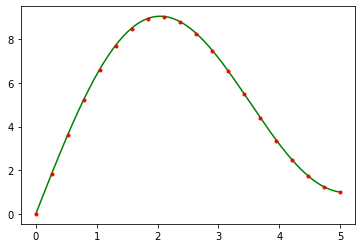

In [48]:
from numpy import ones_like, zeros, linspace
from numpy.linalg import solve
import matplotlib.pyplot as plt

N = 20 # num of points
a = 0
b = 5
x,h = linspace(a,b,N,retstep = True)
v = x.copy()  #right hand side
v[-1] = 1   #boundary conditions
v[0] = 0

A = zeros([N,N])
A[0,0]=1
A[N-1,N-1] = 1

for i in range(1,N-1):
    A[i,i-1] = 1/h/h  - 1/2/h/x[i]     #This is where you need to change the differential equation
    A[i,i]= -2/h/h +(1 -1/x[i]/x[i])
    A[i,i+1]=1/h/h + 1/2/h/x[i]

y = solve(A,v)
    
    
# Comparing against function 
import numpy as np
def f(m,x,theta):
    return np.cos(m*theta-x*np.sin(theta))
def J(m,x):
    N = 1000
    a = 0
    b = np.pi
    h = (b-a)/N
    S = f(m,x,a)+f(m,x,b)
    for k in range(1,N,2):
        S+= 4*f(m,x,a+k*h)
    for k in range(2,N,2):
        S+= 2*f(m,x,a+k*h)
    return 1/3 * h*S

xsol = np.linspace(a,b,1000)
plt.plot(xsol,-4/J(1,5)*J(1,xsol)+xsol,'g')
plt.plot(x,y,'r.')
plt.show()

### Conclusion
Once I have 20 points, it looks close enough to the solution. 